In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go                           #type: ignore
from plotly import data                                     #type: ignore    
import plotly.express as px                                 #type: ignore
from plotly.subplots import make_subplots                   #type: ignore
  
from dash.dependencies import Input, Output, State          #type: ignore
import dash                                                 #type: ignore                       
from dash import dcc, html                                  #type: ignore    

In [2]:
df_pwf16 = pd.read_csv('data/PTOPER_202210_PWF16_OPF.csv')
df_pwf25 = pd.read_csv('data/PTOPER_202210_PWF25_OPF.csv')
df_pwf25['XING_TOT'] = df_pwf25['XESTR_MW'] + df_pwf25['XTRIO_MW']
df_pwf = pd.concat([df_pwf16, df_pwf25.iloc[:, 2:]], axis=1)
df_pwf_hour = df_pwf[::2].reset_index().drop('index', axis=1)
df_pwf_hour

,Dia,Hora,EXP_NEN,EXP_NESE,EXP_NE,EXP_SULSECO,EXP_NS,FOZIB_MW,PVLARRQ_MW,CPVPVL_MW,XESTR_MW,XTRIO_MW,XING_TOT
0,2,00:00,1532.4,5173.8,6706.2,1227.1,2214.6,3708.0,665.0,448.0,200.0,292.0,492.0
1,2,01:00,1999.5,4435.3,6434.8,1563.9,1307.4,3708.0,575.0,442.0,200.0,200.0,400.0
2,2,02:00,2260.5,3937.7,6198.2,1914.6,795.5,3708.0,896.0,40.0,200.0,200.0,400.0
3,2,03:00,2272.1,1848.4,4120.5,2262.2,-1133.9,3708.0,1014.0,40.0,2114.0,200.0,2314.0
4,2,04:00,1341.6,2260.0,3601.6,2279.1,-109.7,3708.0,1026.0,40.0,200.0,200.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,29,19:00,2721.1,5800.8,8521.9,2037.3,1783.3,5004.0,1992.0,40.0,1503.0,200.0,1703.0
668,29,20:00,2747.7,5761.4,8509.1,769.2,1760.3,5043.0,1992.0,40.0,1827.0,200.0,2027.0
669,29,21:00,5041.9,4879.0,9920.9,412.4,-391.3,3687.0,1992.0,40.0,1415.0,4000.0,5415.0
670,29,22:00,4652.9,4826.1,9479.0,512.0,47.9,3303.0,2002.0,40.0,491.0,4000.0,4491.0


# Contour Plot

In [3]:
dia = np.unique(df_pwf_hour['Dia'])
hora = np.unique(df_pwf_hour['Hora'])

z_flows = []
vals = []
flow_cols = list(df_pwf_hour.columns[2:])

for j in range(0, len(flow_cols)):
    lst = []
    for i in range(0, 673):
        if i % 24 == 0 and i != 0:
            lst.append(vals)
            vals = []
        
        if i == 672:
            break
        vals.append(df_pwf_hour[flow_cols[j]][i])
    z_flows.append(lst)

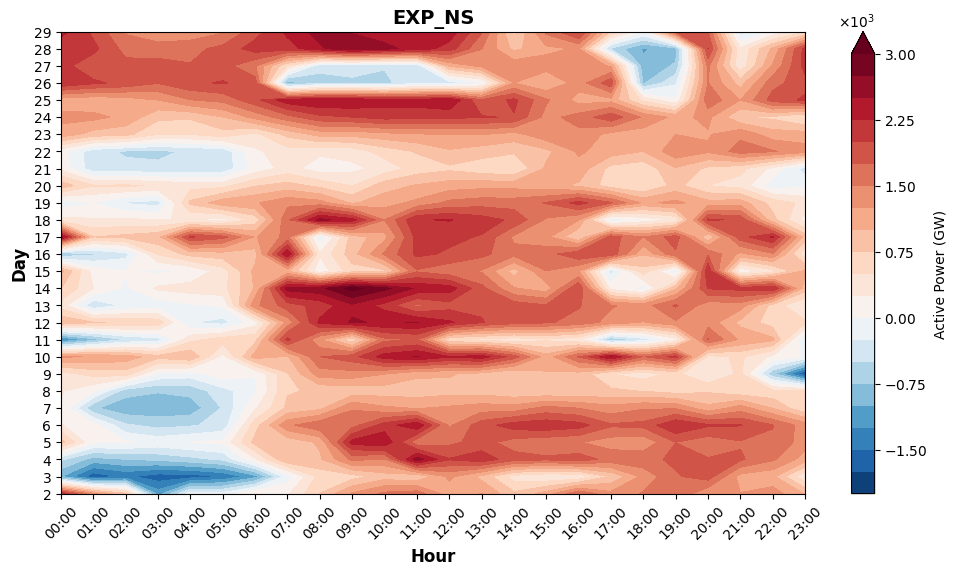

In [5]:
from matplotlib.colors import TwoSlopeNorm

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

k = 4
norm   = TwoSlopeNorm(0)

if flow_cols[k] == 'EXP_S':
    contour = ax.contourf(hora, dia[::-1], np.array(z_flows[k][::-1]), 20, 
                          cmap='RdBu_r', 
                          extend='max', 
                          norm=norm)
else:
    contour = ax.contourf(hora, dia[::-1], np.array(z_flows[k][::-1]), 20, 
                          cmap='RdBu_r', 
                          extend='max',  
                          norm=norm)

cbar1 = plt.colorbar(contour, ax=ax)
cbar1.formatter.set_powerlimits((3, 3))
cbar1.formatter.set_useMathText(True)
cbar1.ax.set_ylabel('Active Power (GW)', rotation=90)

ax.set_xlabel("Hour", weight='bold', fontsize=12)
ax.set_ylabel("Day", weight='bold', fontsize=12)
ax.set_yticks(np.arange(2, 30))
ax.set_xticks(np.arange(0, 24))
ax.set_xticklabels(hora, rotation=45)
ax.set_title(f'{flow_cols[k]}', weight='bold', fontsize=14)

plt.show()

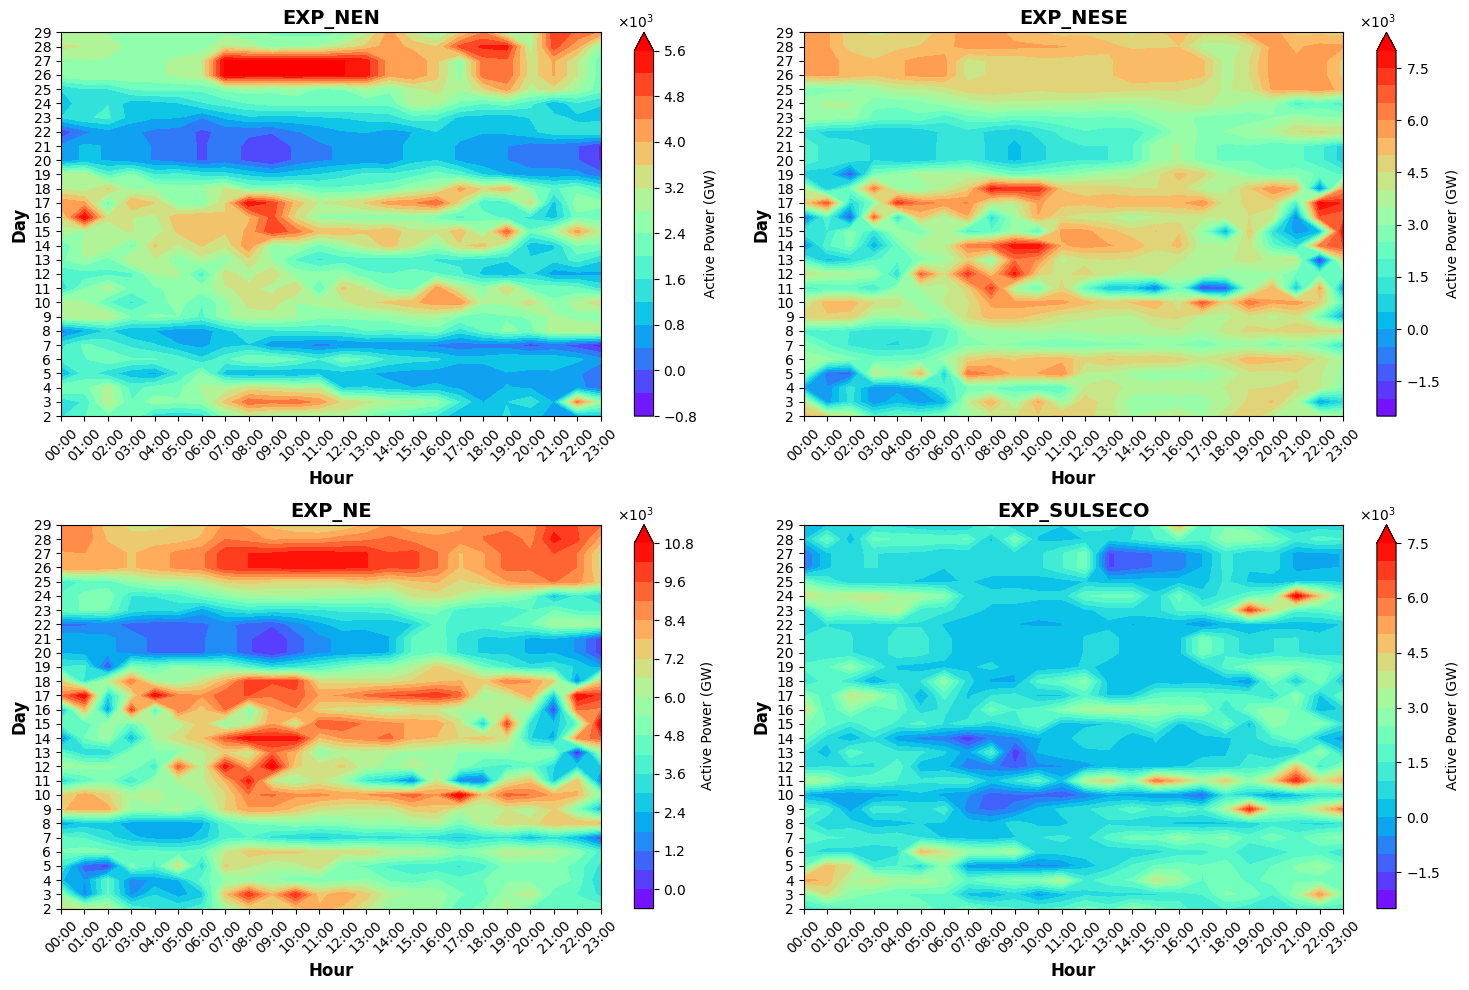

In [41]:
nrows = 2
ncols = 2

fig, ax = plt.subplots(nrows, ncols, figsize=(15, 10))

k = 0
for nr in range(nrows):
    for nc in range(ncols):
        if flow_cols[k] == 'EXP_NS':
            contour = ax[nr][nc].contourf(hora, dia[::-1], np.array(z_flows[k][::-1]), 20, cmap='seismic', extend='max')
        else:
            contour = ax[nr][nc].contourf(hora, dia[::-1], np.array(z_flows[k][::-1]), 20, cmap='rainbow', extend='max')

        cbar1 = plt.colorbar(contour, ax=ax[nr][nc])
        cbar1.formatter.set_powerlimits((3, 3))
        cbar1.formatter.set_useMathText(True)
        cbar1.ax.set_ylabel('Active Power (GW)', rotation=90)

        ax[nr][nc].set_xlabel("Hour", weight='bold', fontsize=12)
        ax[nr][nc].set_ylabel("Day", weight='bold', fontsize=12)
        ax[nr][nc].set_yticks(np.arange(2, 30))
        ax[nr][nc].set_xticks(np.arange(0, 24))
        ax[nr][nc].set_xticklabels(hora, rotation=45)
        ax[nr][nc].set_title(f'{flow_cols[k]}', weight='bold', fontsize=14)

        k += 1

plt.tight_layout()
plt.show()

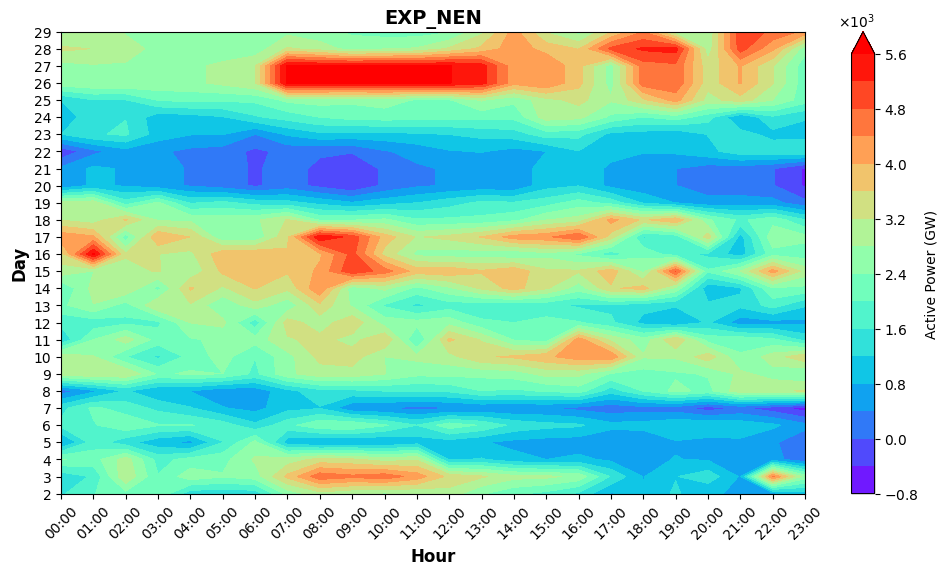

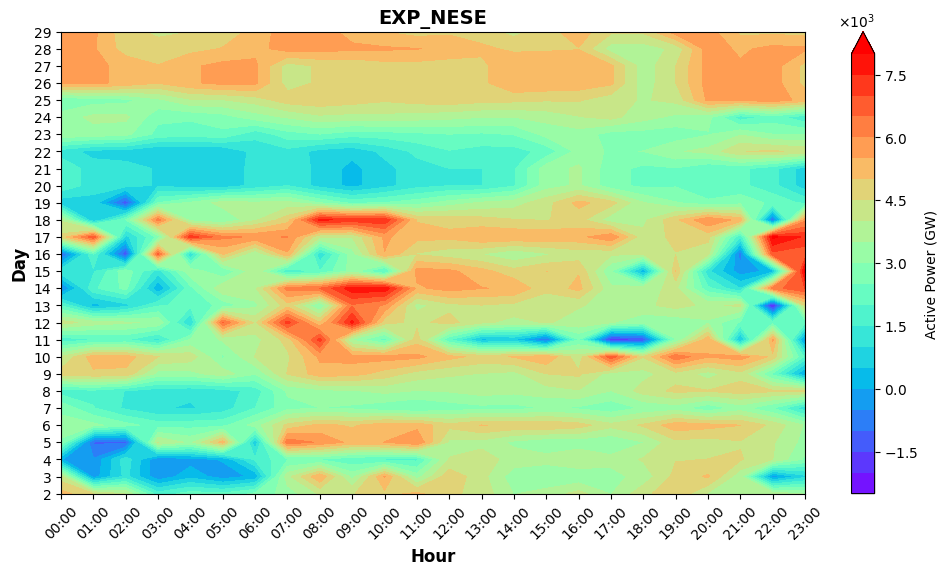

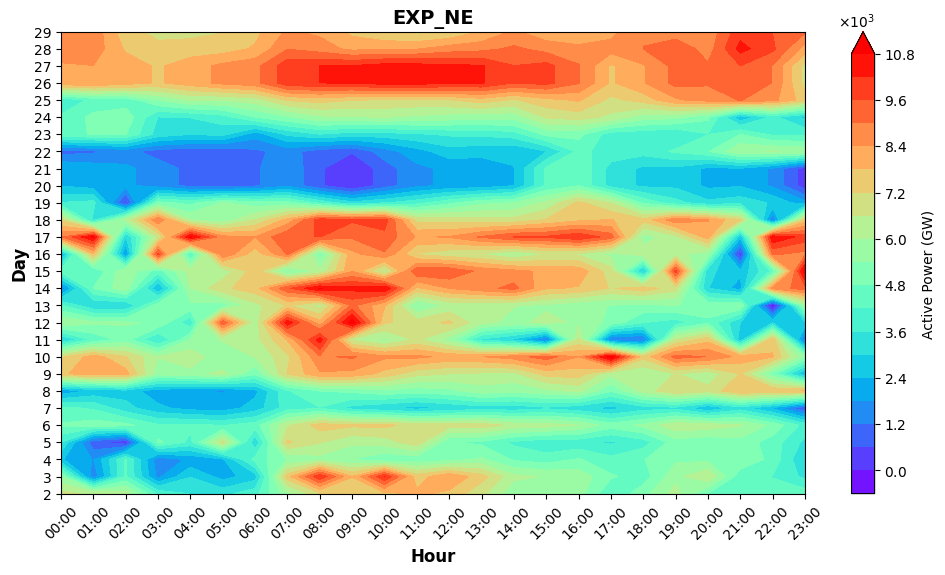

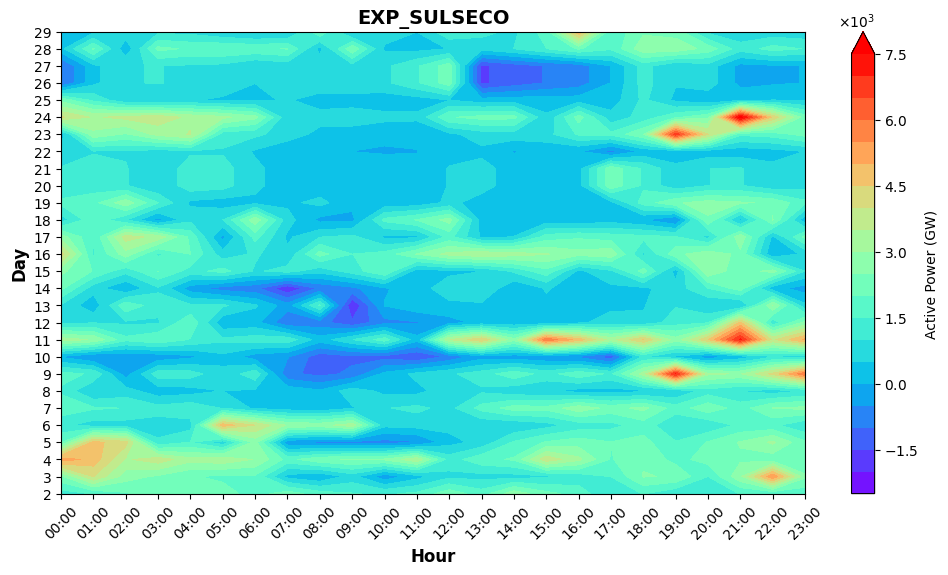

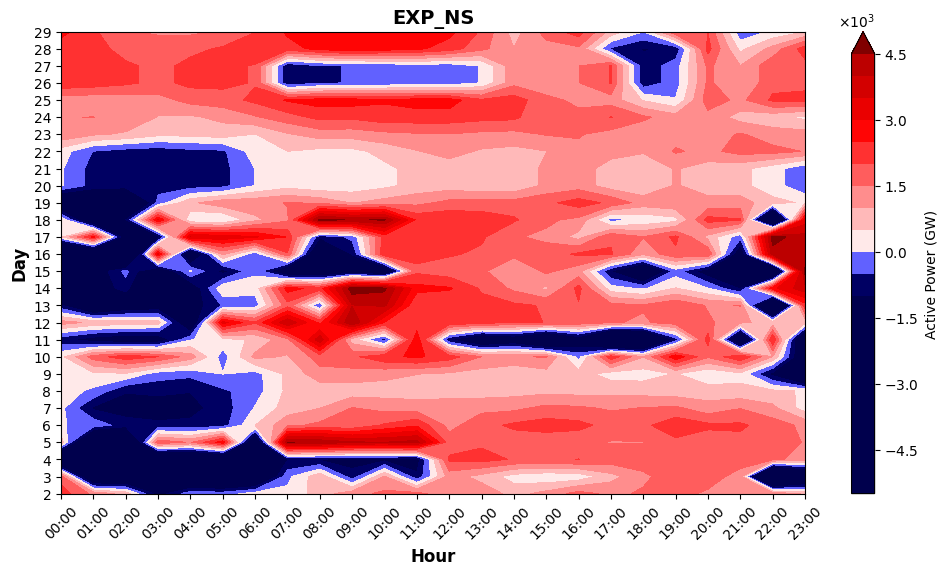

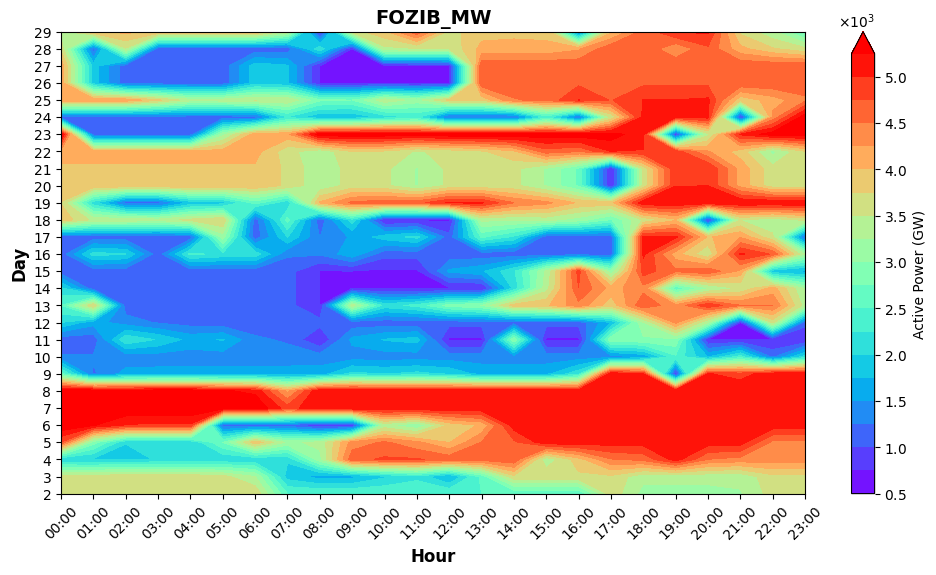

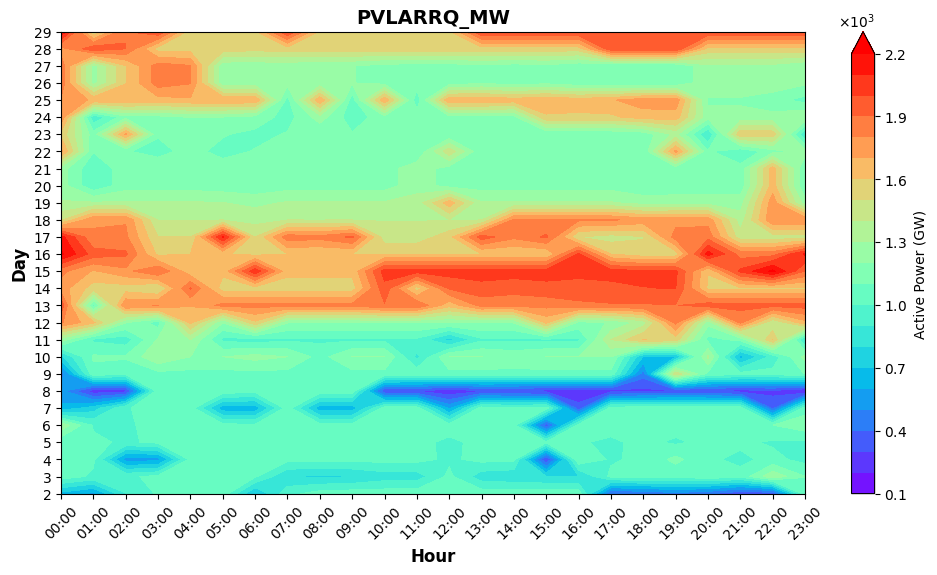

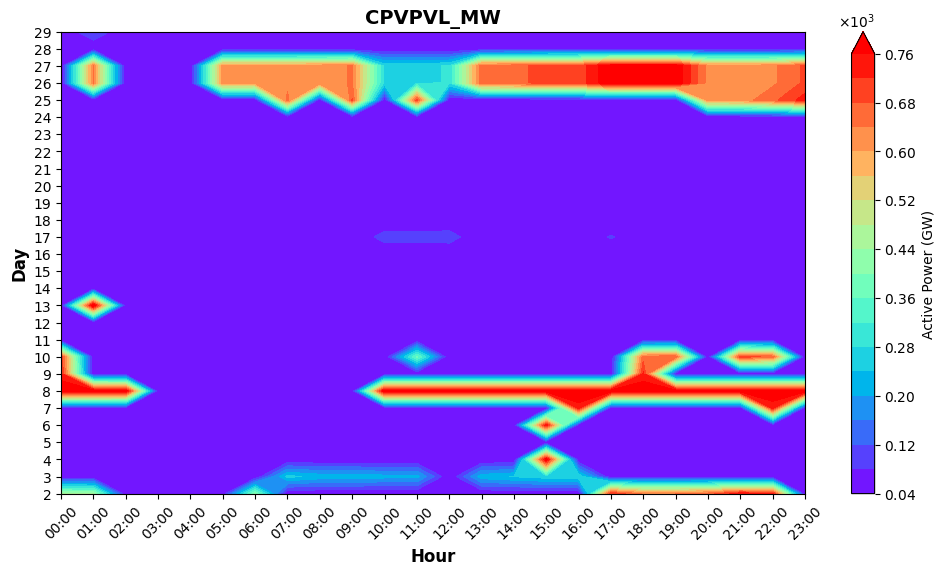

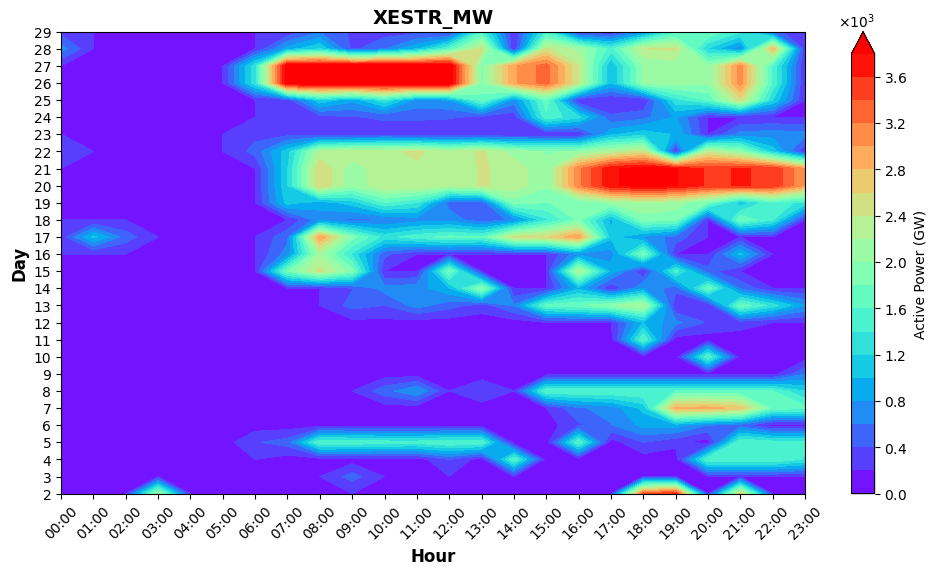

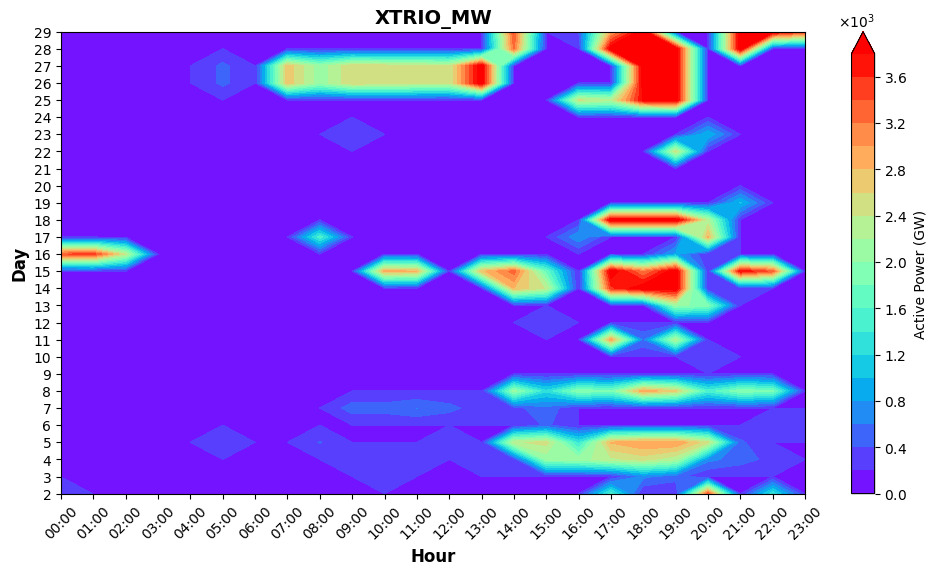

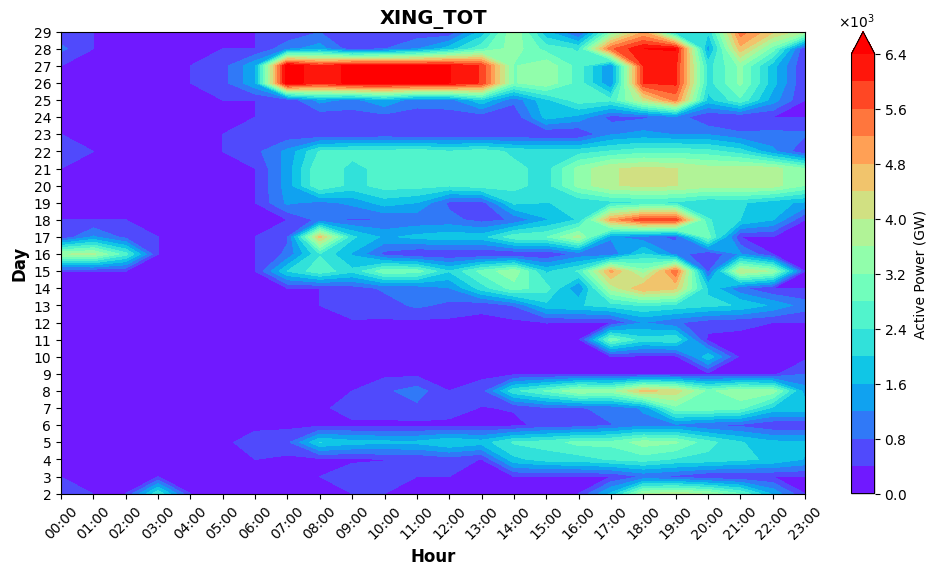

In [70]:
k = 0

for i in range(len(flow_cols)):
    plt.figure(figsize=(12, 6))
    
    if flow_cols[k] == 'EXP_NS':
        contour = plt.contourf(hora, dia[::-1], np.array(z_flows[k][::-1]), 20, 
                               cmap='seismic', extend='max', norm=norm)
    else:
        contour = plt.contourf(hora, dia[::-1], np.array(z_flows[k][::-1]), 20, 
                               cmap='rainbow', extend='max')

    cbar1 = plt.colorbar(contour)
    cbar1.formatter.set_powerlimits((3, 3))
    cbar1.formatter.set_useMathText(True)
    cbar1.ax.set_ylabel('Active Power (GW)', rotation=90)

    plt.xlabel("Hour", weight='bold', fontsize=12)
    plt.ylabel("Day", weight='bold', fontsize=12)
    plt.yticks(np.arange(2, 30))
    plt.xticks(np.arange(0, 24))
    plt.xticks(hora, rotation=45)
    plt.title(f'{flow_cols[k]}', weight='bold', fontsize=14)

    plt.savefig(f'results/Contour/{flow_cols[k]}_CP.png', bbox_inches='tight')
    plt.show()

    k += 1

# BoxPlot

In [73]:
def box_plot(df, col, typ, date):
    fig = px.box(df, x="Nome Elo", y=col, color="Nome Elo")

    fig.update_layout(
        title_x=0.5,
        autosize=False,
        width=1000,
        height=500,
        font_family="Courier",
        font_color="black",
        title=dict(text=f"<b>{typ} ({date})</b>", font=dict(size=30), yref='paper'),
        showlegend=False,
        xaxis_title=dict(text='Interconnection', font=dict(size=18)),
        yaxis_title=dict(text='Active Power (MW)', font=dict(size=18)),
        xaxis=dict(tickfont=dict(size=11)),
        yaxis=dict(tickfont=dict(size=11)),
    )

    fig.update_xaxes(ticks="outside", 
                    tickwidth=2, 
                    tickcolor='black', 
                    ticklen=5,
                    tickfont_family="Arial Black")
    fig.update_yaxes(ticks="outside", 
                    tickwidth=2, 
                    tickcolor='black', 
                    ticklen=5, 
                    col=1,
                    tickfont_family="Arial Black")

    plt.savefig('results/BoxPlot/')
    fig.show()

In [78]:
pwf16_hm = pd.read_csv('data/PTOPER_202210_PWF16_AllDecomp.csv')
pwf16_hm.columns = ['Dia', 'Hora', 'P(MW)', 'Nome Elo']

In [81]:
pwf25_hm = pd.read_csv('data/PTOPER_202210_PWF25_AllDecomp.csv')

In [79]:
box_plot(pwf16_hm, "P(MW)", "PWF16", "2022_10")

In [82]:
box_plot(pwf25_hm, "P(MW)", "PWF25", "2022_10")

# ViolinPlot

In [83]:
def violin_plot(df, col, typ, date, points=None):
    fig = px.violin(df, x="Nome Elo", y=col, color="Nome Elo", points=points)

    fig.update_layout(
        title_x=0.5,
        autosize=False,
        width=1000,
        height=500,
        font_family="Courier",
        font_color="black",
        title=dict(text=f"<b>{typ} ({date})</b>", font=dict(size=30), yref='paper'),
        showlegend=False,
        xaxis_title=dict(text='Interconnection', font=dict(size=18)),
        yaxis_title=dict(text='Active Power (MW)', font=dict(size=18)),
        xaxis=dict(tickfont=dict(size=11)),
        yaxis=dict(tickfont=dict(size=11)),
    )

    fig.update_xaxes(ticks="outside", 
                    tickwidth=2, 
                    tickcolor='black', 
                    ticklen=5,
                    tickfont_family="Arial Black")
    fig.update_yaxes(ticks="outside", 
                    tickwidth=2, 
                    tickcolor='black', 
                    ticklen=5, 
                    col=1,
                    tickfont_family="Arial Black")
    fig.update_traces(meanline_visible=True)

    fig.show()

In [86]:
violin_plot(pwf16_hm, "P(MW)", "PWF16", "2022_10")

In [87]:
violin_plot(pwf16_hm, "P(MW)", "PWF16", "2022_10", 'all')

In [88]:
violin_plot(pwf25_hm, "P(MW)", "PWF25", "2022_10")

In [89]:
violin_plot(pwf25_hm, "P(MW)", "PWF25", "2022_10", 'all')